# **Assignment 6**
Assignment on Regression technique.  
I have considered Microsoft Stocks dataset. 
a) Apply Linear Regression using suitable library function and predict the Month-wise 
temperature. 
b) Assess the performance of regression models using MSE, MAE and R-Square metrics 
c) Visualize simple regression model. 

In [8]:
! pip uninstall tensorflow
! pip install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\adite\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\adite\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [13]:
microsoft_df=pd.read_csv("E:/my documents/ML Clg Assignments/Assignment_6/MSFT.csv")

In [14]:
microsoft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [15]:
microsoft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [16]:
microsoft_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


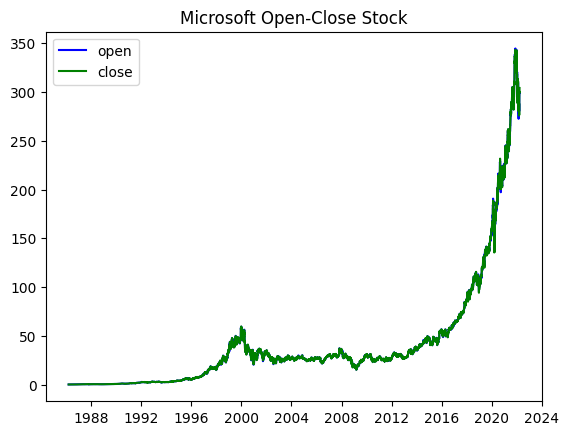

In [19]:
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])

plt.plot(microsoft_df['Date'], 
         microsoft_df['Open'], 
         color="blue", 
         label="open") 
plt.plot(microsoft_df['Date'], 
         microsoft_df['Close'], 
         color="green", 
         label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend() 

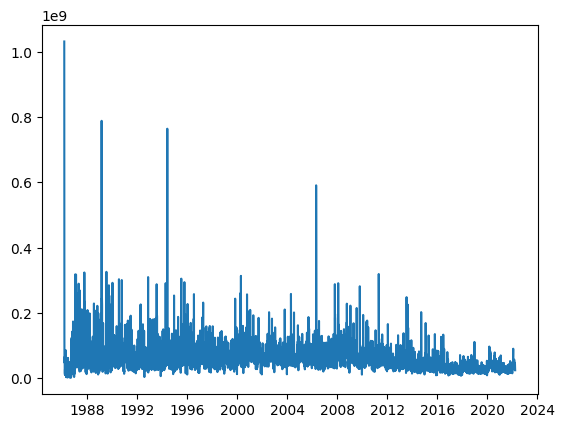

In [20]:
plt.plot(microsoft_df['Date'],microsoft_df["Volume"])
plt.show()

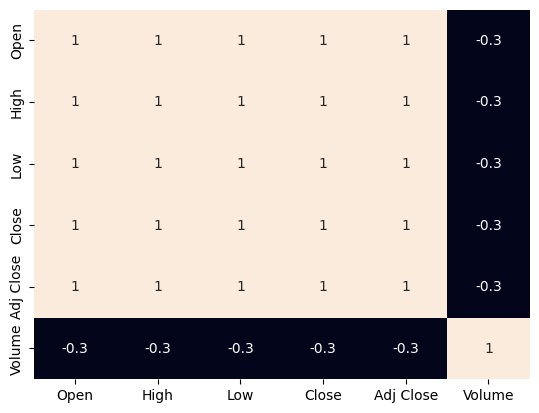

In [21]:
sns.heatmap(microsoft_df.select_dtypes(include=np.number).corr(), 
            annot=True, 
            cbar=False) 
plt.show() 

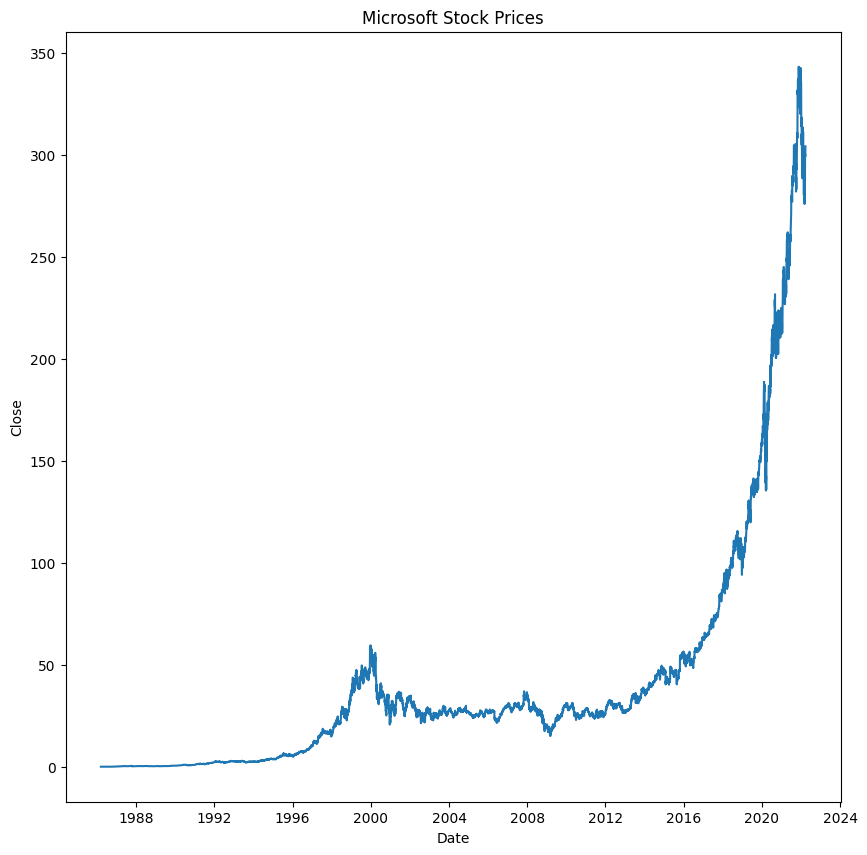

In [27]:
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
prediction = microsoft_df.loc[(microsoft_df['Date']
                            > datetime(2013, 1, 1))
                            & (microsoft_df['Date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft_df['Date'], microsoft_df['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")
plt.show()

In [28]:
microsoft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [29]:
X=microsoft_df.drop('Close',axis=1)
y=microsoft_df['Close']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

# Drop the 'Date' column from the features
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), 1))

[[46.79817197 47.080002  ]
 [28.15863069 27.700001  ]
 [ 4.47453885  4.367188  ]
 ...
 [39.73497849 40.        ]
 [32.78987331 32.349998  ]
 [26.59655469 26.610001  ]]


In [36]:
print("Performance (R^2): ", model.score(X_train, y_train))

Performance (R^2):  0.9999324127510344


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.9999429154091144

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_pred)

0.22287395315302602

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_pred)

0.21721587574744652

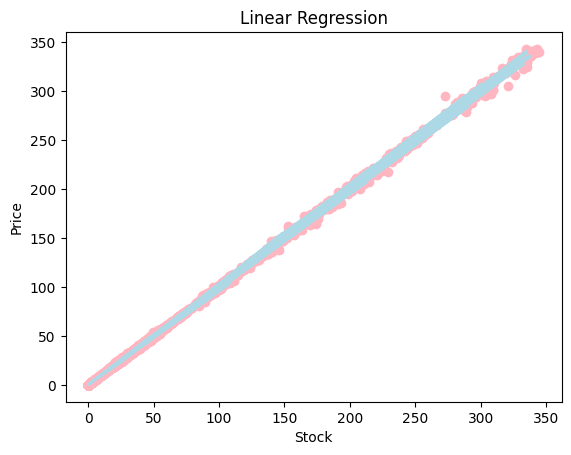

In [43]:
plt.scatter(X_train['Open'], y_train, color='lightpink')
plt.plot(X_test['Open'], y_pred, color='lightblue')
plt.title('Linear Regression')
plt.xlabel('Stock')
plt.ylabel('Price')
plt.show()
     